In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0-rc1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

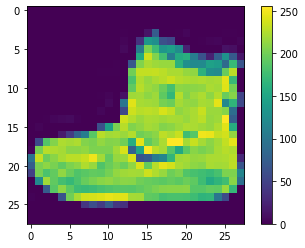

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

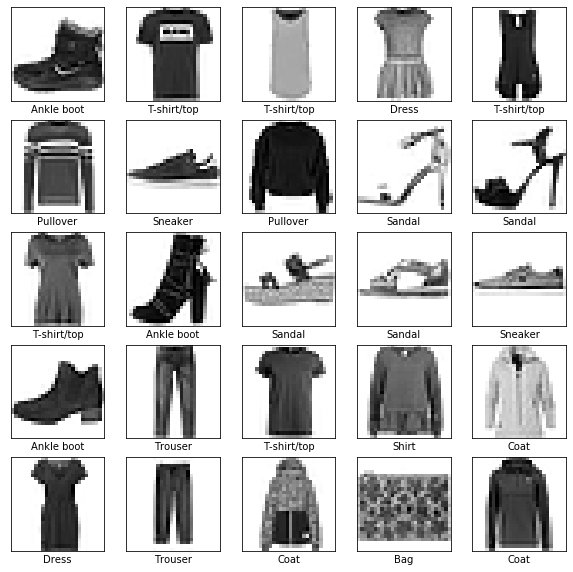

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Softmax())

In [10]:
model.compile(optimizer='adam', 
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 1.6395 - accuracy: 0.8215
Epoch 2/10
60000/60000 [==============================] - 2s 40us/sample - loss: 1.6377 - accuracy: 0.8232
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 1.6376 - accuracy: 0.8237
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1.6353 - accuracy: 0.8257
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 1.6336 - accuracy: 0.8278
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 1.6327 - accuracy: 0.8285
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 1.6321 - accuracy: 0.8290
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 1.6304 - accuracy: 0.8309
Epoch 9/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1.6289 - accuracy: 0.8322
Epoch 10/10
60

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n Test accuracy: ", test_acc)

10000/1 - 0s - loss: 1.6013 - accuracy: 0.8164

 Test accuracy:  0.8164


In [32]:
predictions = model.predict(test_images)

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} (:2.0f)%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]), 
                                       color=color) 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

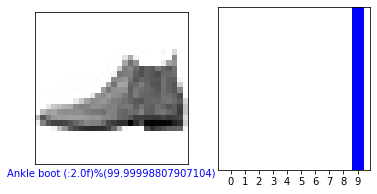

In [34]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

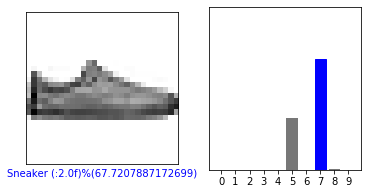

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

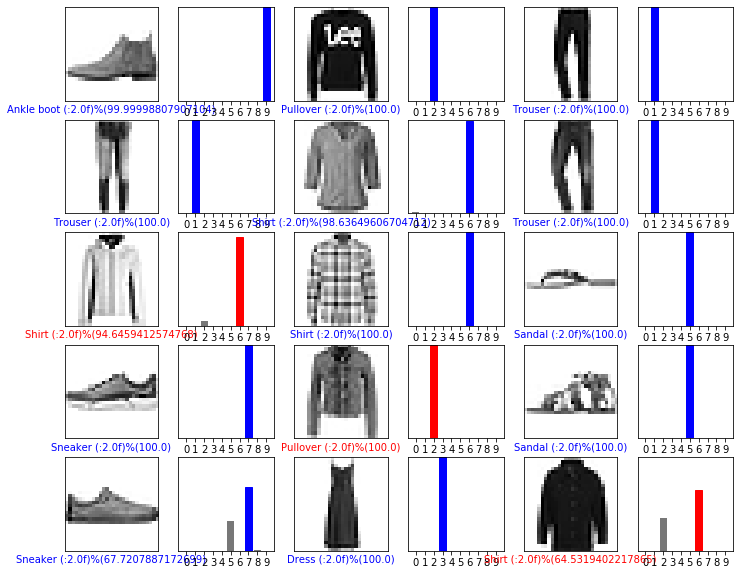

In [36]:
num_cols = 3
num_rows = 5
num_images = num_cols*num_rows
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols*2, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, num_cols*2, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
